# World Happiness Report

# Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.shape

(158, 12)

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
#No null valuse

In [8]:
df.loc[df['Happiness Rank']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [9]:
df.loc[df['Happiness Score']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [10]:
df.loc[df['Standard Error']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [11]:
df.loc[df['Economy (GDP per Capita)']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [12]:
df.loc[df['Family']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [13]:
df.loc[df['Health (Life Expectancy)']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [14]:
df.loc[df['Freedom']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [15]:
df.loc[df['Trust (Government Corruption)']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [16]:
df.loc[df['Generosity']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [17]:
df.loc[df['Dystopia Residual']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [18]:
# our data set is free from blank spaces

In [19]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

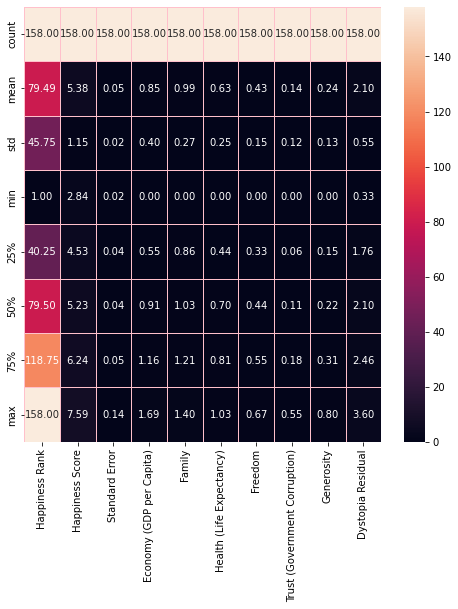

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.describe(),annot=True,linecolor='Pink',linewidths=.5,fmt='0.02f')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

C:\Users\RIYAZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

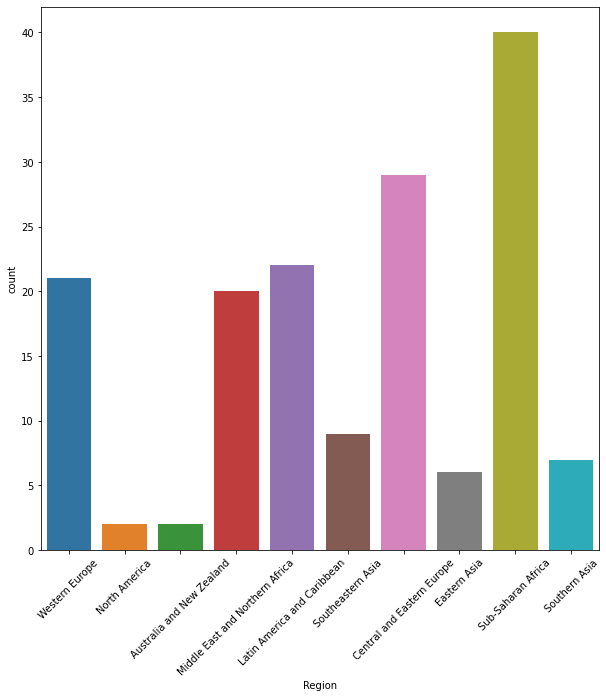

In [23]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(df['Region'])

In [24]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

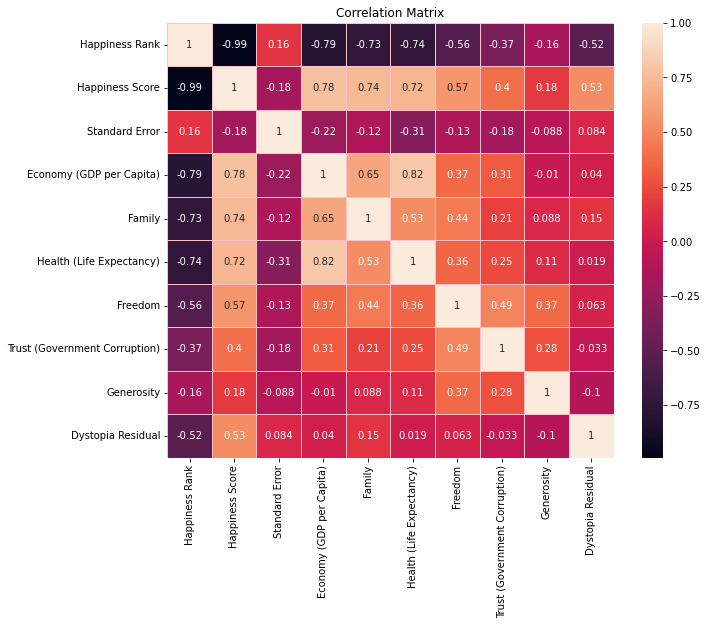

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linecolor='Pink',linewidths=.5)
plt.title("Correlation Matrix")

In [26]:
#correlation value with target value

In [27]:
corr_matrix=df.corr()

In [28]:
corr_matrix['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [29]:
#Economy,family and Health(Lif Expectancy showing high correlation)

In [30]:
#Scatterplot >because it show relationship

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

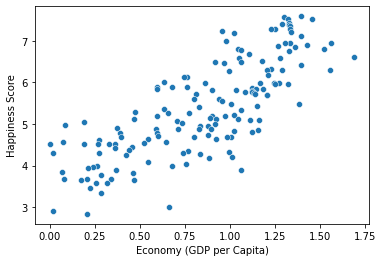

In [31]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

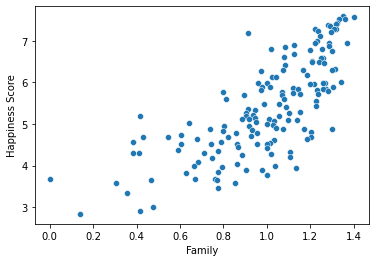

In [32]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

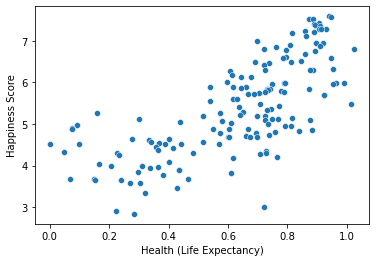

In [33]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

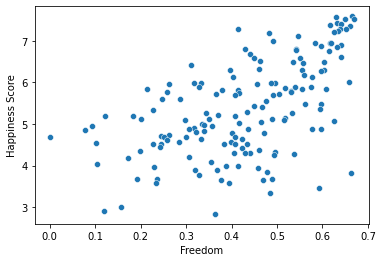

In [34]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

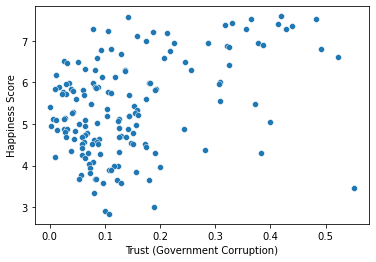

In [35]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

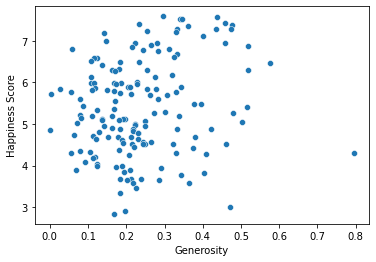

In [36]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

In [37]:
#Checking distribution of data

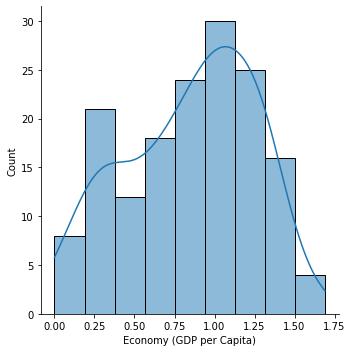

In [38]:
sns.displot(df['Economy (GDP per Capita)'],kde=True)

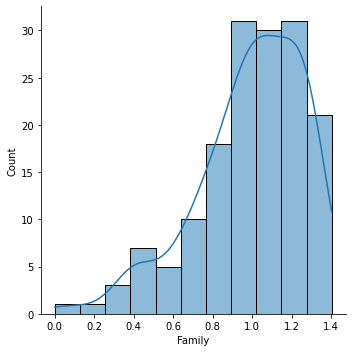

In [39]:
sns.displot(df['Family'],kde=True)

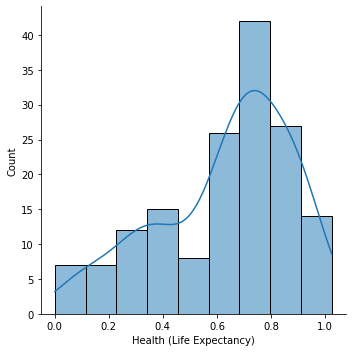

In [40]:
sns.displot(df['Health (Life Expectancy)'],kde=True)

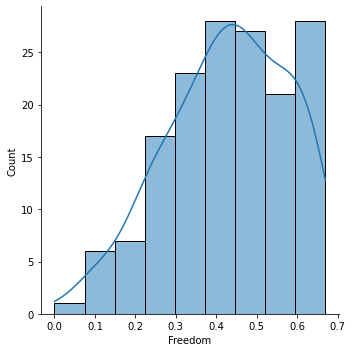

In [41]:
sns.displot(df['Freedom'],kde=True)

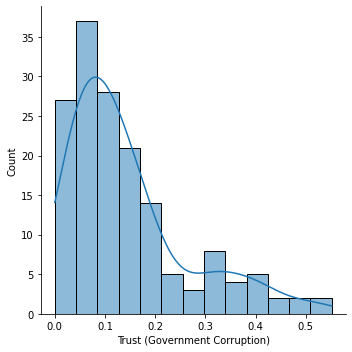

In [42]:
sns.displot(df['Trust (Government Corruption)'],kde=True)

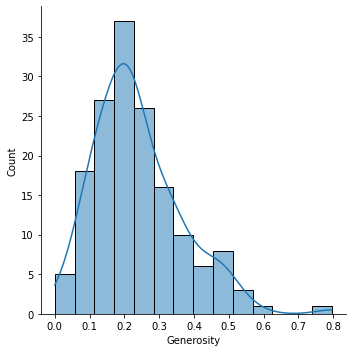

In [43]:
sns.displot(df['Generosity'],kde=True)

In [44]:
#all the data showing the skewness so we need to remove the skewness

In [45]:
#lable encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
LE=LabelEncoder()
df["Region"]=LE.fit_transform(df["Region"])

In [48]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [49]:
#now encoding is done for Regionabs

C:\Users\RIYAZ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

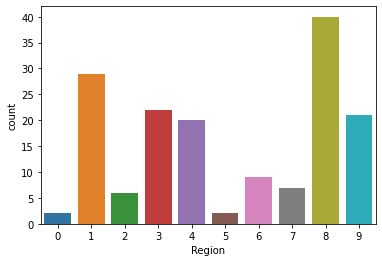

In [50]:
sns.countplot(df['Region'])

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

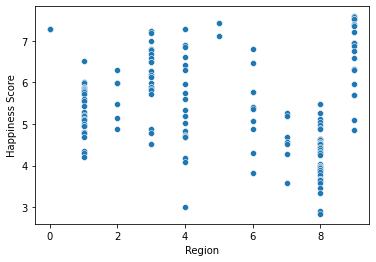

In [51]:
sns.scatterplot(x='Region',y='Happiness Score',data=df)

In [52]:
#showing in which region happiness score is high

In [53]:
# pre processing ,Splittion the independant and traget variable 

In [54]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [55]:
x=df.drop(['Country','Happiness Rank','Happiness Score'],axis=1)

In [56]:
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [57]:
y=df["Happiness Score"]

In [58]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [59]:
x.skew()

Region                          -0.116119
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [60]:
#removing skewness

In [61]:
from sklearn.preprocessing import PowerTransformer

In [62]:
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x)


In [63]:
x=pd.DataFrame(x_new_pt,columns=x.columns)

In [64]:
x.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
Generosity                       0.013320
Standard Error                  -0.020092
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Region                          -0.228041
dtype: float64

In [65]:
# skewness is removed,now checking outliers

<AxesSubplot:>

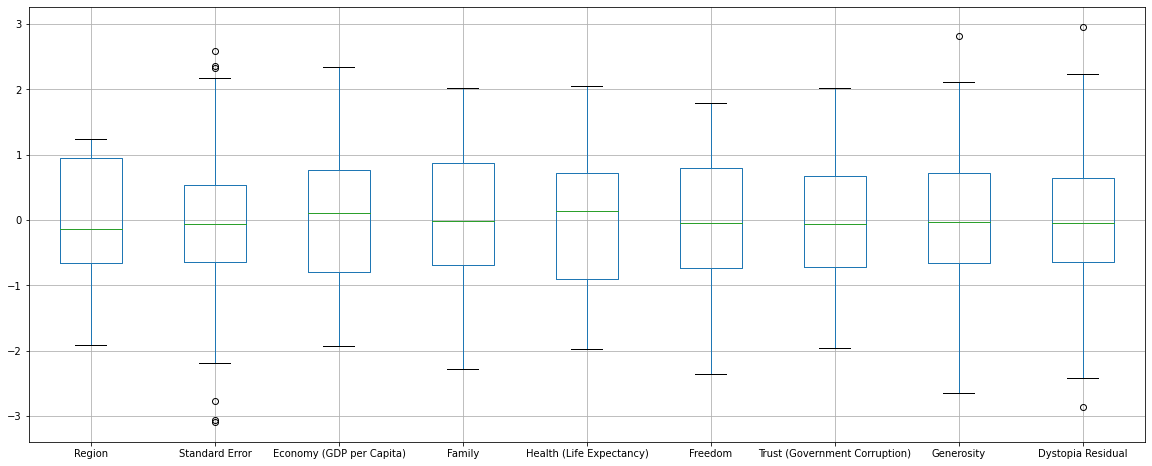

In [66]:
x.loc[:,:].boxplot(figsize=(20,8))

In [67]:
#we can see few values for 3 columns is very neer to the wisker so thease are not outliers

In [68]:
#quantify

In [69]:
from scipy.stats import zscore

In [70]:
z=np.abs(zscore(x))

threshold=3
np.where(z>3)




(array([20, 25], dtype=int64), array([1, 1], dtype=int64))

In [71]:
z.shape

(158, 9)

In [72]:
x.shape

(158, 9)

In [73]:
x_new=x[(z<3).all(axis=1)]

In [74]:
x_new.shape

(156, 9)

In [75]:
loss_precentage=(158-156)/158*100

In [76]:
loss_precentage

1.2658227848101267

In [77]:
#data loss is less then 10 percent 

In [78]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :{r2_score(y_test,pred_test)}")
    print("\n")
    

At random state0,the training accuracy is :0.992885897613442
At random state 0,the testing accuracy is :0.9930725099239369


At random state1,the training accuracy is :0.9928498773138148
At random state 1,the testing accuracy is :0.9928058256724391


At random state2,the training accuracy is :0.992139807422256
At random state 2,the testing accuracy is :0.9951996819590871


At random state3,the training accuracy is :0.992293694734699
At random state 3,the testing accuracy is :0.9951091317813276


At random state4,the training accuracy is :0.9917310020686657
At random state 4,the testing accuracy is :0.995544775410569


At random state5,the training accuracy is :0.9932336600147618
At random state 5,the testing accuracy is :0.989813764751593


At random state6,the training accuracy is :0.9926762862759715
At random state 6,the testing accuracy is :0.9933308807223424


At random state7,the training accuracy is :0.9934805508411272
At random state 7,the testing accuracy is :0.9898314418062975

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [82]:
#tarin the model
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
pred_test=lr.predict(x_test)

In [84]:
pred_test

array([5.07956551, 6.20103492, 4.52559507, 7.32434674, 5.83575179,
       7.37068   , 6.05949833, 5.61412691, 6.81412869, 5.33763279,
       6.00517358, 3.88491719, 5.85147578, 3.70081726, 4.31114027,
       5.09082169, 6.70451182, 4.52919727, 6.81083655, 4.9090934 ,
       4.45565197, 4.03154306, 4.58099446, 6.4969283 , 7.44678341,
       6.98787859, 4.71912013, 5.8457886 , 6.0404745 , 3.14812647,
       3.90825747, 4.95562247])

In [85]:
print(r2_score(y_test,pred_test))

0.9948959339012942


In [86]:
#Cross VAlidattion of the model

In [87]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.8442788211737104 and accuracy score for training is -1.0551981378726971 and accuracy for the testing is 0.9948959339012942


At cross fold3 the cv score is 0.8787421103861459 and accuracy score for training is -1.0551981378726971 and accuracy for the testing is 0.9948959339012942


At cross fold4 the cv score is 0.8336361169912863 and accuracy score for training is -1.0551981378726971 and accuracy for the testing is 0.9948959339012942


At cross fold5 the cv score is 0.7974110124530831 and accuracy score for training is -1.0551981378726971 and accuracy for the testing is 0.9948959339012942


At cross fold6 the cv score is 0.6973952457196358 and accuracy score for training is -1.0551981378726971 and accuracy for the testing is 0.9948959339012942


At cross fold7 the cv score is 0.6046622716048582 and accuracy score for training is -1.0551981378726971 and accuracy for the testing is 0.9948959339012942


At cross fold8 the cv score is 0.5666241723059097 an

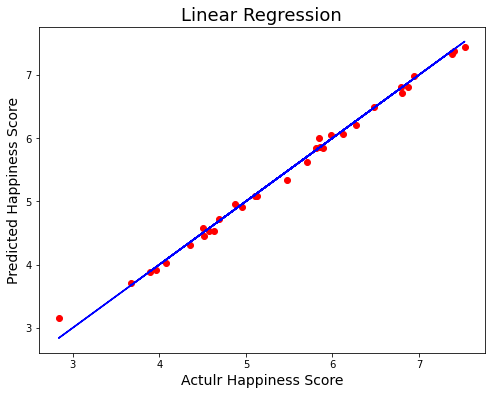

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actulr Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

In [89]:
#Best fit line is covering most of the datapoints which shows good fit of our model

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [91]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,1,10]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001}


In [92]:
# final model training
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

99.23917623688548

In [93]:
pred_ls=ls.predict(x_test)

In [94]:
pred_ls

array([5.0802367 , 6.20105609, 4.52580934, 7.32395847, 5.83541668,
       7.37047299, 6.05929124, 5.61440961, 6.81391719, 5.33792128,
       6.00512097, 3.88548576, 5.85136402, 3.70105404, 4.31130056,
       5.09080603, 6.70428626, 4.52948495, 6.81037866, 4.90917105,
       4.45540194, 4.03172929, 4.58124018, 6.49667901, 7.44650938,
       6.98785155, 4.71898504, 5.84558232, 6.04035037, 3.14857233,
       3.90842137, 4.9555223 ])

In [95]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

79.77275534588883

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [97]:
parameter={'criterion':['mse','mae'],
          'max_features':["auto","sqrt",'loge']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [98]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


r2 score: 92.15815416469314
Cross Val Score: -302.4901287978174
